In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=218993fcd5bfed9267582aec0558c6b9


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | turbat
Processing Record 2 of Set 1 | sangar
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | calama
Processing Record 8 of Set 1 | shellbrook
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | tukrah
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | vyara
Processing Record 19 of Set 1 | kabalo
Processing Record 20 of Set 1 | isla vista
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | busselton
Proce

Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | etchojoa
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | asfi
Processing Record 43 of Set 4 | warqla
City not found. Skipping...
Processing Record 44 of Set 4 | ensley
Processing Record 45 of Set 4 | prince rupert
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | toamasina
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | cedral
Processing Record 3 of Set 5 | banda aceh
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | boyolangu
Processing Record 6 of Set 5 | arrecife
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | kulhudhuffushi
Processing Record 9 of Set 5 | the valley
Processing Record 10 of Set 5 | saint anthony
Processing Record

Processing Record 25 of Set 8 | zhigansk
Processing Record 26 of Set 8 | puerto escondido
Processing Record 27 of Set 8 | svetlaya
Processing Record 28 of Set 8 | chicama
Processing Record 29 of Set 8 | verkhoyansk
Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | asprovalta
Processing Record 32 of Set 8 | batemans bay
Processing Record 33 of Set 8 | sibu
Processing Record 34 of Set 8 | malwan
City not found. Skipping...
Processing Record 35 of Set 8 | humboldt
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | tazovskiy
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | clyde river
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | mount pleasant
Processing Record 46 of Set 8 | camocim
Processing Record 47 of Set 8 | ouesso
Proces

Processing Record 15 of Set 12 | miandrivazo
Processing Record 16 of Set 12 | nago
Processing Record 17 of Set 12 | chandrakona
Processing Record 18 of Set 12 | marquette
Processing Record 19 of Set 12 | katwa
Processing Record 20 of Set 12 | tanda
Processing Record 21 of Set 12 | alta floresta
Processing Record 22 of Set 12 | iranshahr
Processing Record 23 of Set 12 | muli
Processing Record 24 of Set 12 | ulaangom
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | comodoro rivadavia
Processing Record 27 of Set 12 | anloga
Processing Record 28 of Set 12 | jamnagar
Processing Record 29 of Set 12 | bardiyah
Processing Record 30 of Set 12 | carbondale
Processing Record 31 of Set 12 | lomza
Processing Record 32 of Set 12 | matara
Processing Record 33 of Set 12 | portland
Processing Record 34 of Set 12 | ibotirama
Processing Record 35 of Set 12 | musson
Processing Record 36 of Set 12 | flin flon
Processing Record 37 of Set 12 | eyl
Processing Record 38 of Set 12 | pishin


In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turbat,26.0023,63.0440,80.11,56,0,3.49,PK,2021-04-05 19:57:38
1,Sangar,63.9242,127.4739,-11.13,99,100,0.47,RU,2021-04-05 19:57:39
2,Te Anau,-45.4167,167.7167,49.57,80,86,4.90,NZ,2021-04-05 19:57:39
3,Georgetown,5.4112,100.3354,82.40,83,20,3.74,MY,2021-04-05 19:57:39
4,Ponta Do Sol,32.6667,-17.1000,61.00,63,100,1.25,PT,2021-04-05 19:57:40
5,Paamiut,61.9940,-49.6678,34.74,89,100,7.25,GL,2021-04-05 19:57:40
6,Calama,-22.4667,-68.9333,75.20,15,20,25.32,CL,2021-04-05 19:54:08
7,Shellbrook,53.2168,-106.4011,46.40,49,20,12.66,CA,2021-04-05 19:57:41
8,Kaitangata,-46.2817,169.8464,50.00,70,23,1.99,NZ,2021-04-05 19:57:41
9,Thompson,55.7435,-97.8558,35.60,100,90,3.44,CA,2021-04-05 19:56:20


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]



In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turbat,PK,2021-04-05 19:57:38,26.0023,63.0440,80.11,56,0,3.49
1,Sangar,RU,2021-04-05 19:57:39,63.9242,127.4739,-11.13,99,100,0.47
2,Te Anau,NZ,2021-04-05 19:57:39,-45.4167,167.7167,49.57,80,86,4.90
3,Georgetown,MY,2021-04-05 19:57:39,5.4112,100.3354,82.40,83,20,3.74
4,Ponta Do Sol,PT,2021-04-05 19:57:40,32.6667,-17.1000,61.00,63,100,1.25
...,...,...,...,...,...,...,...,...,...
552,Marau,BR,2021-04-05 19:56:25,-28.4492,-52.2000,75.72,53,95,3.11
553,Yanam,IN,2021-04-05 20:00:50,16.7333,82.2167,75.43,93,33,1.83
554,Nsanje,MW,2021-04-05 20:00:51,-16.9200,35.2620,71.24,87,40,3.87
555,Englewood,US,2021-04-05 20:00:51,39.6478,-104.9878,77.00,15,100,1.99


In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

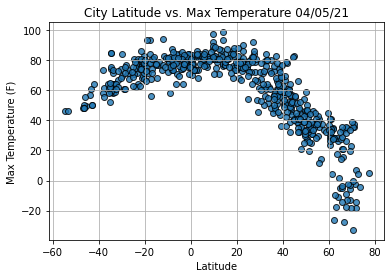

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

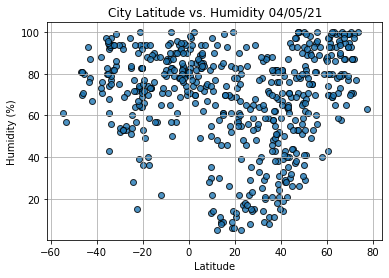

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

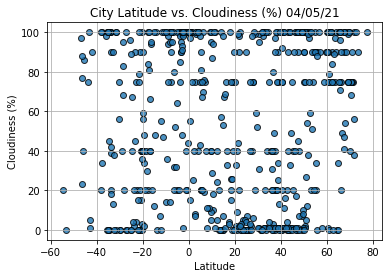

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

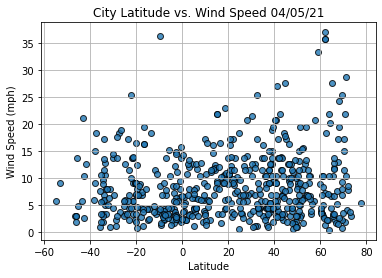

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value**2}")
    print(f"The line_eq is: {line_eq}")
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                       Tukrah
Country                        LY
Date          2021-04-05 19:57:43
Lat                       32.5341
Lng                       20.5791
Max Temp                    79.36
Humidity                       14
Cloudiness                     98
Wind Speed                  25.48
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
552    False
553     True
554    False
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turbat,PK,2021-04-05 19:57:38,26.0023,63.0440,80.11,56,0,3.49
1,Sangar,RU,2021-04-05 19:57:39,63.9242,127.4739,-11.13,99,100,0.47
3,Georgetown,MY,2021-04-05 19:57:39,5.4112,100.3354,82.40,83,20,3.74
4,Ponta Do Sol,PT,2021-04-05 19:57:40,32.6667,-17.1000,61.00,63,100,1.25
5,Paamiut,GL,2021-04-05 19:57:40,61.9940,-49.6678,34.74,89,100,7.25
...,...,...,...,...,...,...,...,...,...
550,Jamame,SO,2021-04-05 20:00:49,0.0722,42.7506,80.78,81,100,6.69
551,Oyama,JP,2021-04-05 20:00:50,36.3000,139.8000,50.00,70,40,10.36
553,Yanam,IN,2021-04-05 20:00:50,16.7333,82.2167,75.43,93,33,1.83
555,Englewood,US,2021-04-05 20:00:51,39.6478,-104.9878,77.00,15,100,1.99


In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turbat,PK,2021-04-05 19:57:38,26.0023,63.0440,80.11,56,0,3.49
1,Sangar,RU,2021-04-05 19:57:39,63.9242,127.4739,-11.13,99,100,0.47
3,Georgetown,MY,2021-04-05 19:57:39,5.4112,100.3354,82.40,83,20,3.74
4,Ponta Do Sol,PT,2021-04-05 19:57:40,32.6667,-17.1000,61.00,63,100,1.25
5,Paamiut,GL,2021-04-05 19:57:40,61.9940,-49.6678,34.74,89,100,7.25


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: 0.7455765475359722
The line_eq is: y = -1.16x + 97.46


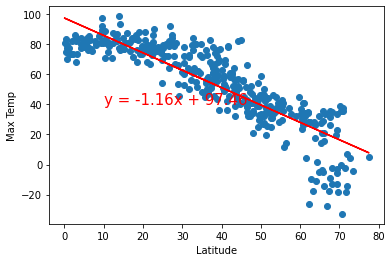

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

The r-value is: 0.4946279087357523
The line_eq is: y = 0.53x + 83.26


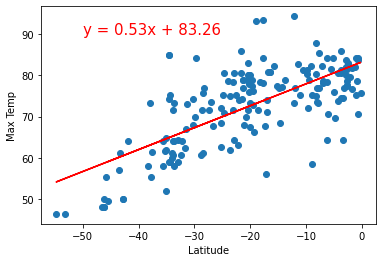

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

The r-value is: 0.06000430462578867
The line_eq is: y = 0.32x + 52.93


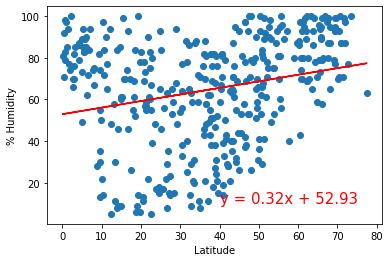

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

The r-value is: 0.007480512404029114
The line_eq is: y = 0.1x + 78.38


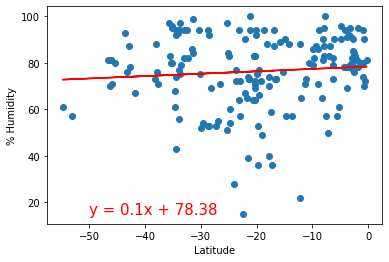

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

The r-value is: 0.040476695404926745
The line_eq is: y = 0.41x + 35.03


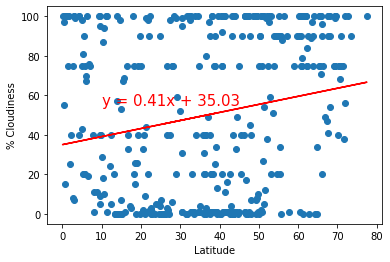

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

The r-value is: 0.050346045360896145
The line_eq is: y = 0.65x + 71.81


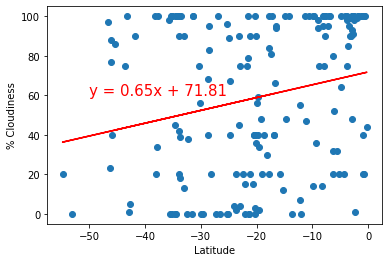

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n % Cloudiness', '% Cloudiness',(-50,60))

The r-value is: 0.009597971736777464
The line_eq is: y = 0.03x + 7.79


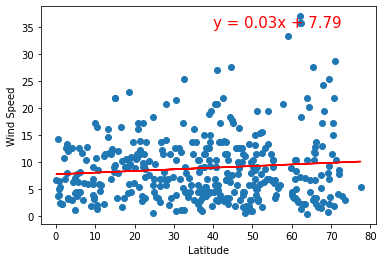

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

The r-value is: 0.010564825155852817
The line_eq is: y = -0.04x + 6.6


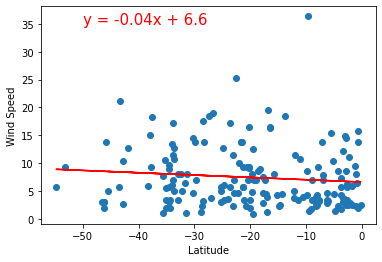

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

